In [5]:
import pandas as pd
df = pd.read_csv('Resources/ViewingActivity.csv')

In [6]:
df.shape

(13586, 10)

In [9]:
df.head(10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ashley,2022-07-12 01:08:41,00:00:05,NaN,Stand Out: An LGBTQ+ Celebration,NaN,Chrome PC (Cadmium),00:00:05,00:00:05,US (United States)
1,Ashley,2022-07-12 01:08:31,00:00:08,Autoplayed: user action: None;,Comedy Clip 3: Stand Out: An LGBTQ+ Celebration,HOOK,Chrome PC (Cadmium),00:00:08,00:00:08,US (United States)
2,Ashley,2022-07-12 01:07:46,00:00:20,Autoplayed: user action: None;,Season 1 Trailer: Snowflake Mountain,TRAILER,Chrome PC (Cadmium),00:00:20,00:00:20,US (United States)
3,Ashley,2022-07-12 01:07:23,00:00:07,Autoplayed: user action: None;,The Vampire Diaries: Season 1_hook_primary_16x9,HOOK,Chrome PC (Cadmium),00:00:07,00:00:07,US (United States)
4,Ashley,2022-07-12 00:15:11,00:00:40,Autoplayed: user action: None;,Season 1 Cliffhanger Clip: How To Build A Sex ...,HOOK,Chrome PC (Cadmium),00:00:00,00:00:00,US (United States)
5,Ashley,2022-07-11 06:46:09,01:11:44,NaN,Stranger Things: Stranger Things 4: Chapter Tw...,NaN,FireTV 4K Stick 2018,01:11:48,01:11:48,US (United States)
6,Ashley,2022-07-11 06:15:12,00:30:52,NaN,Stranger Things: Stranger Things 4: Chapter On...,NaN,FireTV 4K Stick 2018,01:13:19,01:13:19,US (United States)
7,Ashley,2022-07-11 00:43:48,00:42:22,NaN,Stranger Things: Stranger Things 4: Chapter On...,NaN,FireTV 4K Stick 2018,00:42:27,Not latest view,US (United States)
8,Ashley,2022-07-10 23:40:29,01:02:34,NaN,Stranger Things: Stranger Things 3: Chapter Ei...,NaN,FireTV 4K Stick 2018,01:14:49,01:14:49,US (United States)
9,Ashley,2022-07-10 23:30:58,00:09:10,NaN,Stranger Things: Stranger Things 3: Chapter Fo...,NaN,FireTV 4K Stick 2018,00:09:10,00:09:10,US (United States)


In [10]:
df = df.drop(['Attributes', 'Supplemental Video Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(10)

,Profile Name,Start Time,Duration,Title,Device Type
0,Ashley,2022-07-12 01:08:41,00:00:05,Stand Out: An LGBTQ+ Celebration,Chrome PC (Cadmium)
1,Ashley,2022-07-12 01:08:31,00:00:08,Comedy Clip 3: Stand Out: An LGBTQ+ Celebration,Chrome PC (Cadmium)
2,Ashley,2022-07-12 01:07:46,00:00:20,Season 1 Trailer: Snowflake Mountain,Chrome PC (Cadmium)
3,Ashley,2022-07-12 01:07:23,00:00:07,The Vampire Diaries: Season 1_hook_primary_16x9,Chrome PC (Cadmium)
4,Ashley,2022-07-12 00:15:11,00:00:40,Season 1 Cliffhanger Clip: How To Build A Sex ...,Chrome PC (Cadmium)
5,Ashley,2022-07-11 06:46:09,01:11:44,Stranger Things: Stranger Things 4: Chapter Tw...,FireTV 4K Stick 2018
6,Ashley,2022-07-11 06:15:12,00:30:52,Stranger Things: Stranger Things 4: Chapter On...,FireTV 4K Stick 2018
7,Ashley,2022-07-11 00:43:48,00:42:22,Stranger Things: Stranger Things 4: Chapter On...,FireTV 4K Stick 2018
8,Ashley,2022-07-10 23:40:29,01:02:34,Stranger Things: Stranger Things 3: Chapter Ei...,FireTV 4K Stick 2018
9,Ashley,2022-07-10 23:30:58,00:09:10,Stranger Things: Stranger Things 3: Chapter Fo...,FireTV 4K Stick 2018


In [11]:
df.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
Device Type     object
dtype: object

In [12]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
Device Type                  object
dtype: object

In [13]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to Pacific time
df.index = df.index.tz_convert('US/Pacific')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(10)

,Start Time,Profile Name,Duration,Title,Device Type
0,2022-07-11 18:08:41-07:00,Ashley,00:00:05,Stand Out: An LGBTQ+ Celebration,Chrome PC (Cadmium)
1,2022-07-11 18:08:31-07:00,Ashley,00:00:08,Comedy Clip 3: Stand Out: An LGBTQ+ Celebration,Chrome PC (Cadmium)
2,2022-07-11 18:07:46-07:00,Ashley,00:00:20,Season 1 Trailer: Snowflake Mountain,Chrome PC (Cadmium)
3,2022-07-11 18:07:23-07:00,Ashley,00:00:07,The Vampire Diaries: Season 1_hook_primary_16x9,Chrome PC (Cadmium)
4,2022-07-11 17:15:11-07:00,Ashley,00:00:40,Season 1 Cliffhanger Clip: How To Build A Sex ...,Chrome PC (Cadmium)
5,2022-07-10 23:46:09-07:00,Ashley,01:11:44,Stranger Things: Stranger Things 4: Chapter Tw...,FireTV 4K Stick 2018
6,2022-07-10 23:15:12-07:00,Ashley,00:30:52,Stranger Things: Stranger Things 4: Chapter On...,FireTV 4K Stick 2018
7,2022-07-10 17:43:48-07:00,Ashley,00:42:22,Stranger Things: Stranger Things 4: Chapter On...,FireTV 4K Stick 2018
8,2022-07-10 16:40:29-07:00,Ashley,01:02:34,Stranger Things: Stranger Things 3: Chapter Ei...,FireTV 4K Stick 2018
9,2022-07-10 16:30:58-07:00,Ashley,00:09:10,Stranger Things: Stranger Things 3: Chapter Fo...,FireTV 4K Stick 2018


In [14]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time      datetime64[ns, US/Pacific]
Profile Name                        object
Duration                   timedelta64[ns]
Title                               object
Device Type                         object
dtype: object

In [15]:
# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'The Office (U.S.)'
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]
office.sample(20)

,Start Time,Profile Name,Duration,Title,Device Type
2654,2019-07-02 13:22:36-07:00,Ashley,0 days 00:13:12,The Office (U.S.): Season 8: Free Family Portr...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
6082,2019-02-24 21:04:23-08:00,Barbara,0 days 00:20:55,The Office (U.S.): Season 3: Product Recall (E...,DishTV Dish Hopper w/Sling MVPD STB
2657,2019-07-02 12:32:53-07:00,Ashley,0 days 00:21:50,The Office (U.S.): Season 8: Fundraiser (Episo...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
3930,2019-02-05 21:11:14-08:00,Ashley,0 days 00:08:37,The Office (U.S.): Season 5: New Boss (Episode...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
2620,2019-07-08 13:56:22-07:00,Ashley,0 days 00:20:28,The Office (U.S.): Season 2: Booze Cruise (Epi...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
1780,2020-07-04 02:00:31-07:00,Ashley,0 days 00:21:38,The Office (U.S.): Season 5: New Boss (Episode...,LG 2016 MStar M2 Low DTV Smart TV
2666,2019-07-01 22:15:37-07:00,Ashley,0 days 00:07:56,The Office (U.S.): Season 8: Get the Girl (Epi...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
1917,2019-09-17 16:56:53-07:00,Ashley,0 days 00:00:49,The Office (U.S.): Season 9: Junior Salesman (...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
2391,2019-07-29 17:48:37-07:00,Ashley,0 days 00:07:03,The Office (U.S.): Season 9: Work Bus (Episode 4),Sharp Sharp MTK5659 5.0 FHD TV Smart TV
2381,2019-07-29 21:08:41-07:00,Ashley,0 days 00:00:03,The Office (U.S.): Season 9: Junior Salesman (...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV


In [16]:
office.shape

(950, 5)

In [17]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(915, 5)

In [19]:
 office.sample(20) 

,Start Time,Profile Name,Duration,Title,Device Type
2546,2019-07-15 11:26:53-07:00,Ashley,0 days 00:20:57,The Office (U.S.): Season 5: Heavy Competition...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
4190,2019-01-15 10:45:48-08:00,Ashley,0 days 00:20:13,The Office (U.S.): Season 3: The Coup (Episode 3),Sharp Sharp MTK5659 5.0 FHD TV Smart TV
2440,2019-07-23 15:14:27-07:00,Ashley,0 days 00:14:11,The Office (U.S.): Season 8: Spooked (Episode 5),Sharp Sharp MTK5659 5.0 FHD TV Smart TV
2974,2019-05-20 17:29:58-07:00,Ashley,0 days 00:17:30,The Office (U.S.): Season 2: Take Your Daughte...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
1999,2019-09-06 17:23:58-07:00,Ashley,0 days 00:21:32,The Office (U.S.): Season 8: Jury Duty (Episod...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
2496,2019-07-17 20:01:37-07:00,Ashley,0 days 00:21:37,The Office (U.S.): Season 7: Counseling (Episo...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
3646,2019-03-10 19:40:27-07:00,Ashley,0 days 00:08:34,The Office (U.S.): Season 7: Training Day (Epi...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
3014,2019-05-16 01:03:29-07:00,Ashley,0 days 00:09:31,The Office (U.S.): Season 2: Christmas Party (...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
1849,2019-09-29 18:44:17-07:00,Ashley,0 days 00:07:53,The Office (U.S.): Season 2: Sexual Harassment...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV
2601,2019-07-09 17:02:35-07:00,Ashley,0 days 00:21:02,The Office (U.S.): Season 3: Initiation (Episo...,Sharp Sharp MTK5659 5.0 FHD TV Smart TV


In [20]:
office['Duration'].sum()

Timedelta('11 days 14:23:11')

In [21]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

# check to make sure the columns were added correctly
office.head(10)

,Start Time,Profile Name,Duration,Title,Device Type,weekday,hour
1520,2020-09-09 04:06:35-07:00,Ashley,0 days 00:21:03,The Office (U.S.): Season 3: The Convict (Epis...,LG 2016 MStar M2 Low DTV Smart TV,2,4
1521,2020-09-09 03:36:50-07:00,Ashley,0 days 00:29:35,The Office (U.S.): Season 3: The Merger (Episo...,LG 2016 MStar M2 Low DTV Smart TV,2,3
1522,2020-09-09 03:03:39-07:00,Ashley,0 days 00:30:05,The Office (U.S.): Season 3: Branch Closing (E...,LG 2016 MStar M2 Low DTV Smart TV,2,3
1523,2020-09-09 02:42:25-07:00,Ashley,0 days 00:21:04,The Office (U.S.): Season 3: Diwali (Episode 6),LG 2016 MStar M2 Low DTV Smart TV,2,2
1524,2020-09-09 02:21:13-07:00,Ashley,0 days 00:21:04,The Office (U.S.): Season 3: Initiation (Episo...,LG 2016 MStar M2 Low DTV Smart TV,2,2
1525,2020-09-09 01:14:28-07:00,Ashley,0 days 00:21:04,The Office (U.S.): Season 3: Grief Counseling ...,LG 2016 MStar M2 Low DTV Smart TV,2,1
1526,2020-09-09 00:53:17-07:00,Ashley,0 days 00:21:01,The Office (U.S.): Season 3: The Coup (Episode 3),LG 2016 MStar M2 Low DTV Smart TV,2,0
1527,2020-09-09 00:31:47-07:00,Ashley,0 days 00:21:18,The Office (U.S.): Season 3: The Convention (E...,LG 2016 MStar M2 Low DTV Smart TV,2,0
1528,2020-09-09 00:09:43-07:00,Ashley,0 days 00:21:53,The Office (U.S.): Season 3: Gay Witch Hunt (E...,LG 2016 MStar M2 Low DTV Smart TV,2,0
1548,2020-09-02 05:53:05-07:00,Ashley,0 days 00:17:55,The Office (U.S.): Season 6: Secret Santa (Epi...,LG 2016 MStar M2 Low DTV Smart TV,2,5


In [22]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

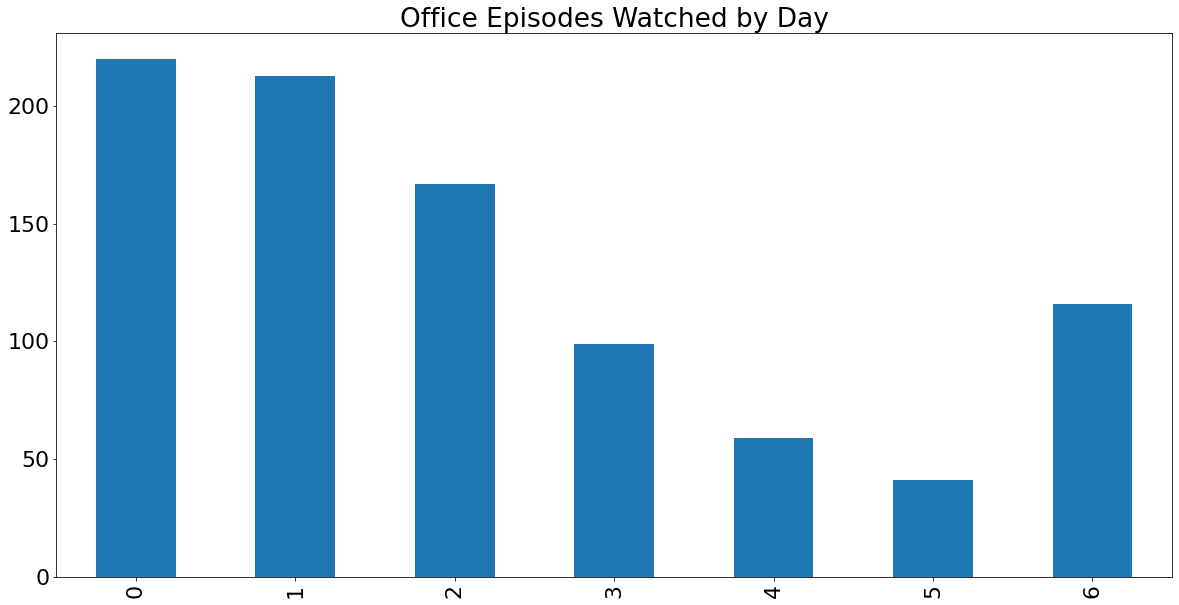

In [23]:
# set our categorical and define the order so the days are plotted Monday-Sunday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

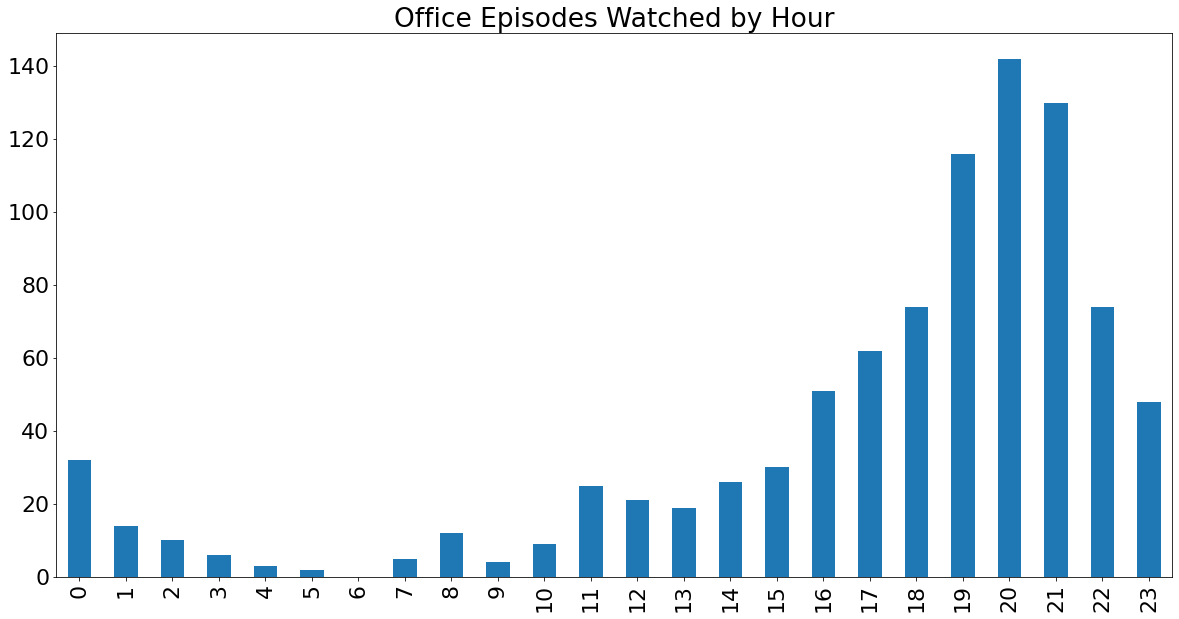

In [24]:
# set our categorical and define the order so the hours are plotted 0-23
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
office_by_hour = office['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')

In [33]:
lword = df[df['Title'].str.contains('The L Word', regex=False)]

In [34]:
lword.shape

(38, 5)

In [35]:
lword.head(10)

,Start Time,Profile Name,Duration,Title,Device Type
4596,2017-10-12 22:57:40-07:00,Ashley,0 days 00:10:08,The L Word: Season 3: Light My Fire (Episode 4),Netflix Chrome MAC (Cadmium) HTML 5
4597,2017-10-12 22:09:32-07:00,Ashley,0 days 00:48:05,The L Word: Season 3: Lobsters (Episode 3),Netflix Chrome MAC (Cadmium) HTML 5
4598,2017-10-12 21:20:26-07:00,Ashley,0 days 00:49:03,The L Word: Season 3: Lost Weekend (Episode 2),Netflix Chrome MAC (Cadmium) HTML 5
4648,2017-08-24 23:35:00-07:00,Ashley,0 days 00:02:05,The L Word: Season 3: Lost Weekend (Episode 2),LG 2016 MStar M2 Low DTV Smart TV
4649,2017-08-24 22:39:58-07:00,Ashley,0 days 00:54:45,The L Word: Season 3: Labia Majora (Episode 1),LG 2016 MStar M2 Low DTV Smart TV
4650,2017-08-24 21:48:48-07:00,Ashley,0 days 00:50:56,The L Word: Season 2: Lacuna (Episode 13),LG 2016 MStar M2 Low DTV Smart TV
4696,2017-08-17 22:26:31-07:00,Ashley,0 days 00:03:17,The L Word: Season 2: Lacuna (Episode 13),LG 2016 MStar M2 Low DTV Smart TV
4697,2017-08-17 00:21:18-07:00,Ashley,0 days 00:03:19,The L Word: Season 2: Lacuna (Episode 13),LG 2016 MStar M2 Low DTV Smart TV
4698,2017-08-16 23:38:46-07:00,Ashley,0 days 00:42:23,The L Word: Season 2: L' Chaim (Episode 12),LG 2016 MStar M2 Low DTV Smart TV
4699,2017-08-16 22:52:13-07:00,Ashley,0 days 00:46:23,The L Word: Season 2: Loud and Proud (Episode 11),LG 2016 MStar M2 Low DTV Smart TV


In [36]:
lword['Duration'].sum()

Timedelta('1 days 01:15:59')

In [39]:
VampDiaries = df[df['Title'].str.contains('Vampire', regex=False)]

In [40]:
VampDiaries.head(10)

,Start Time,Profile Name,Duration,Title,Device Type
3,2022-07-11 18:07:23-07:00,Ashley,0 days 00:00:07,The Vampire Diaries: Season 1_hook_primary_16x9,Chrome PC (Cadmium)
77,2022-04-15 21:14:41-07:00,Ashley,0 days 00:00:04,The Vampire Diaries: Season 5: Dead Man on Cam...,FireTV 4K Stick 2018
78,2022-04-15 20:33:22-07:00,Ashley,0 days 00:41:17,The Vampire Diaries: Season 5: Death and the M...,FireTV 4K Stick 2018
79,2022-04-15 19:52:43-07:00,Ashley,0 days 00:40:35,The Vampire Diaries: Season 5: Handle With Car...,FireTV 4K Stick 2018
80,2022-04-15 19:07:44-07:00,Ashley,0 days 00:41:08,The Vampire Diaries: Season 5: Monster's Ball ...,FireTV 4K Stick 2018
81,2022-04-15 19:04:05-07:00,Ashley,0 days 00:03:36,The Vampire Diaries: Season 5: For Whom the Be...,FireTV 4K Stick 2018
82,2022-04-15 05:29:44-07:00,Ashley,0 days 00:38:26,The Vampire Diaries: Season 5: For Whom the Be...,FireTV 4K Stick 2018
268,2021-09-09 22:09:58-07:00,Ashley,0 days 00:41:05,The Vampire Diaries: Season 5: Original Sin (E...,LG 2016 MStar M2 Low DTV Smart TV
269,2021-09-09 20:48:03-07:00,Ashley,0 days 00:42:15,The Vampire Diaries: Season 5: True Lies (Epis...,LG 2016 MStar M2 Low DTV Smart TV
330,2021-07-12 02:55:29-07:00,Ashley,0 days 00:00:07,The Vampire Diaries: Season 5: True Lies (Epis...,LG 2016 MStar M2 Low DTV Smart TV


In [41]:
VampDiaries.shape

(124, 5)

In [42]:
VampDiaries['Duration'].sum()

Timedelta('2 days 22:45:19')